In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

In [2]:
df_airline = pd.read_csv('dataset/airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


#### ARIMA

- AutoRegression
- Moving average
- Integrated

In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

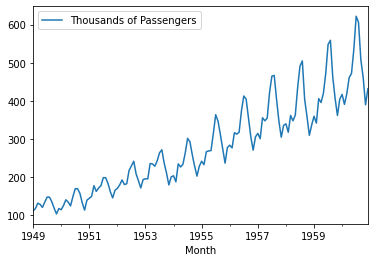

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060463
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [17]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699923
p- value: 0.054213290283826474
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [19]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


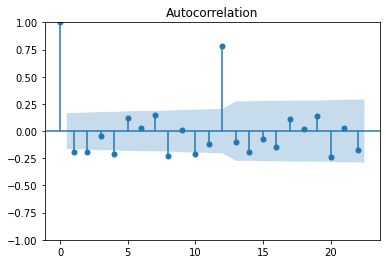

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


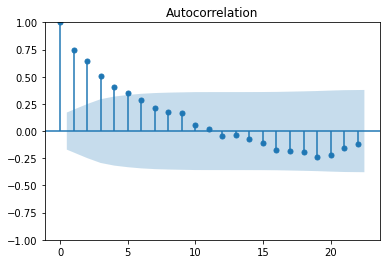

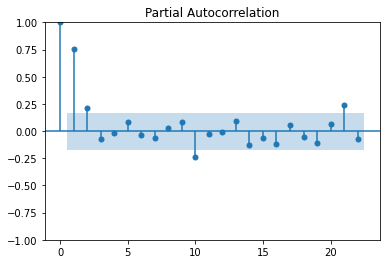

In [21]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

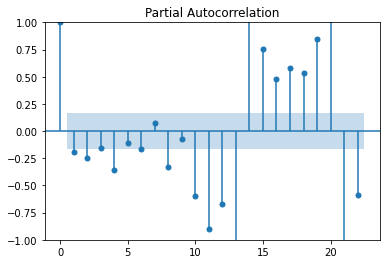

In [22]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

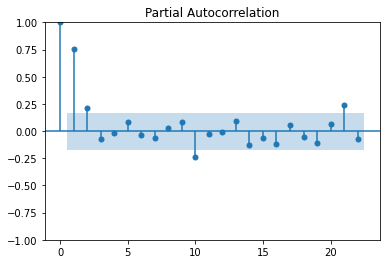

In [23]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


In [24]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [25]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [28]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [29]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [34]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [37]:
import statsmodels.tsa.arima.model.ARIMA

ModuleNotFoundError: No module named 'statsmodels.tsa.arima.model.ARIMA'; 'statsmodels.tsa.arima.model' is not a package

In [38]:
import statsmodels.api as sm

model_ARIMA = sm.tsa.arima.ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))


c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
model_Arima_fit=model_ARIMA.fit()

In [40]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Wed, 31 May 2023   AIC                            773.584
Time:                             16:38:18   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5859    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [42]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [43]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [44]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [45]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

<AxesSubplot:ylabel='Density'>

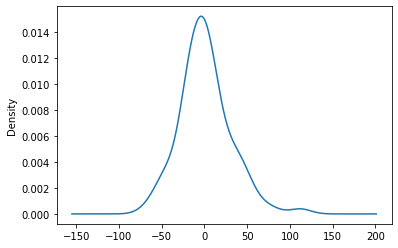

In [46]:
model_Arima_fit.resid.plot(kind='kde')

In [47]:
test_data['Predicted_ARIMA']=pred

C:\Users\Loyumba\AppData\Local\Temp\ipykernel_21752\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

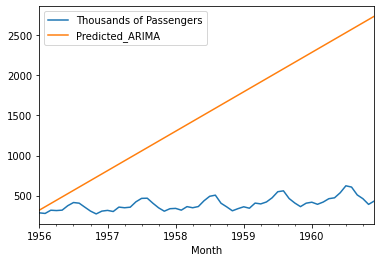

In [48]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


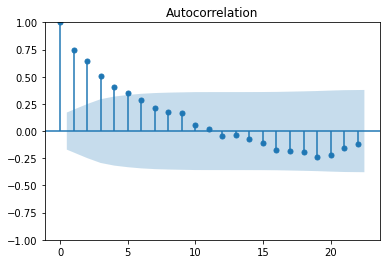

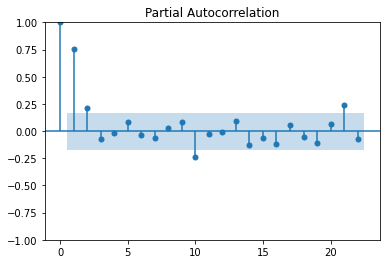

In [49]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [50]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
model_SARIMA_fit=model_SARIMA.fit()

c:\Users\Loyumba\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Wed, 31 May 2023   AIC                            548.481
Time:                                     16:41:18   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.938      0.638      0.523      -1.240       2.438
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4532      0.894     -0.507      0.612      -2.206       1.300
ma.L1          0.1832      1.166      0.157      0.875      -2.101       2.468
ma.L2         -0.5348      1.264     -0.423      0.672      -3.011       1.942
ma.L3         -0.0986      0.385     -0.256      0.798      -0.852       0.655
ma.L4         -0.1272      0.338     -0.377      0.706      -0.789       0.535
ma.L5          0.2471      0.357      0.692      0.489      -0.452       0.947
sigma2        87.7265     81.225      1.080      0.280     -71.473     246.926
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [57]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [58]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

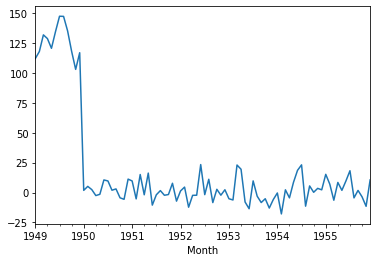

In [59]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

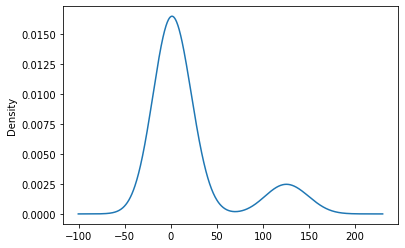

In [60]:
model_SARIMA_fit.resid.plot(kind='kde')

In [61]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Loyumba\AppData\Local\Temp\ipykernel_21752\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [62]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.399007
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.072694
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.446099


<AxesSubplot:xlabel='Month'>

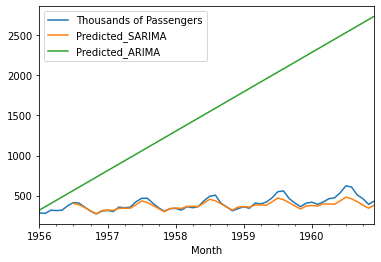

In [63]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()


In [64]:
import pandas

sample = {'name': ['guy1', 'guy2', 'guy3'],
        'address': ['Delhi','Gurgaon', 'Noida'],
        'Phone':[123,345,789]}
df = pd.DataFrame(data = sample)
df

,name,address,Phone
0,guy1,Delhi,123
1,guy2,Gurgaon,345
2,guy3,Noida,789


In [68]:
series1 = df.stack()

In [69]:
series1

0  name          guy1
   address      Delhi
   Phone          123
1  name          guy2
   address    Gurgaon
   Phone          345
2  name          guy3
   address      Noida
   Phone          789
dtype: object

In [81]:
l = [1,2,3,4,5,6,7,8,9]
l[2::3]

[3, 6, 9]

In [82]:
series1[2::3]

0  Phone    123
1  Phone    345
2  Phone    789
dtype: object

In [67]:
df = series1.unstack()
df

,name,address,Phone
0,guy1,Delhi,123
1,guy2,Gurgaon,345
2,guy3,Noida,789


In [1]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [84]:
# url = 
# response = requests.get(url)
# response = response.content


In [2]:
main_url = 'https://www.olx.in/items/q-iphone-13?isSearchCall=true'

response = requests.get(main_url)
# main_soup = BeautifulSoup(response.content, 'html.parser')

# td_elements = main_soup.find_all('td', attrs={'valign': 'BASELINE'})


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
soup = BeautifulSoup(response, 'html.parser') 
# print(soup)       ## html code   
div = soup.find('ul',class_='_266Ly _10aCo')